In [1]:
import pandas as pd
import numpy as np
import math
import time
import pickle
import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from itertools import zip_longest
from collections import Counter
from nltk.corpus import stopwords

In [31]:
data = pd.read_json('F:/tops_fashion.json')

In [32]:
data.columns
data.shape[0]

183138

In [33]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [34]:
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])

Number of data points :  183138 Number of features: 7


In [35]:
data.head(10)

asin                        brand              color  \
0  B016I2TS4W                        FNC7C               None   
1  B01N49AI08                 FIG Clothing               None   
2  B01JDPCOHO                 FIG Clothing               None   
3  B01N19U5H5                      Focal18               None   
4  B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
5  B00TAEHGGS                    Fitscloth              Grape   
6  B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
7  B074GPTP3J                      Floerns               None   
8  B06Y2LCC5S                  Fashion2ne1              Black   
9  B00T9W4E66                         Fila               None   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   
5  https://images-na.ssl-images-amazon.com/images...             SHIRT   
6  https://images-na.ssl-images-amazon.com/images...             SHIRT   
7  https://images-na.ssl-images-amazon.com/images...             SHIRT   
8  https://images-na.ssl-images-amazon.com/images...             SHIRT   
9  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
5  [Fits Cloth] Grape Solid Modern Long Sleeve Pl...            None  
6  Women's Unique 100% Cotton T - Special Olympic...           $9.99  
7  Floerns Women's Bell Sleeve Beading Casual Blo...            None  
8  Standing on His Promises Rhinestones T-Shirt R...            None  
9  Fila Women's Tulip Durable Tennis Style Comfor...            None

In [36]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [37]:
product_type_count = Counter((data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [38]:
print(data['formatted_price'].describe())
print(sum(data.duplicated('title')))
data.shape

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object
7153


(183138, 7)

In [39]:
data = data.loc[data['formatted_price'].notnull()]
#data = data[data.formatted_price.notnull()]
data.shape

(28395, 7)

In [40]:
data = data.loc[data['color'].notnull()]
#data = data[data.color.notnull()]
print(data.shape[0])

28385


In [41]:
data.title.duplicated().sum()
# data['title'].describe()
#print(sum(data.duplicated('title')))

2325

In [42]:
data_sorted = data[data.title.apply(lambda x : len(x.split()) > 4)]

In [43]:
data_sorted.shape[0]
#data_sorted.head()

27949

In [44]:
data_sorted.sort_values('title',inplace=True, ascending=False)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data_sorted.head(10)

asin     brand         color  \
61973   B06Y1KZ2WB    Éclair    Black/Pink   
133820  B010RV33VE  xiaoming          Pink   
81461   B01DDSDLNS  xiaoming         White   
75995   B00X5LYO9Y  xiaoming   Red Anchors   
151570  B00WPJG35K  xiaoming         White   
152506  B00WOB0LHK  xiaoming      Red+Grey   
76209   B014GZY5KK  xiaoming  Figure Color   
103647  B00WPJHEE4  xiaoming        Yellow   
138588  B00X5MLMRA  xiaoming        Yellow   
95954   B00WPK4T4G  xiaoming     red+whtie   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820  https://images-na.ssl-images-amazon.com/images...             SHIRT   
81461   https://images-na.ssl-images-amazon.com/images...             SHIRT   
75995   https://images-na.ssl-images-amazon.com/images...             SHIRT   
151570  https://images-na.ssl-images-amazon.com/images...             SHIRT   
152506  https://images-na.ssl-images-amazon.com/images...             SHIRT   
76209   https://images-na.ssl-images-amazon.com/images...             SHIRT   
103647  https://images-na.ssl-images-amazon.com/images...             SHIRT   
138588  https://images-na.ssl-images-amazon.com/images...             SHIRT   
95954   https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
61973   Éclair Women's Printed Thin Strap Blouse Black...          $24.99  
133820  xiaoming Womens Sleeveless Loose Long T-shirts...          $18.19  
81461   xiaoming Women's White Long Sleeve Single Brea...          $21.58  
75995   xiaoming Stripes Tank Patch/Bear Sleeve Anchor...          $15.91  
151570  xiaoming Sleeve Sheer Loose Tassel Kimono Woma...          $14.32  
152506  xiaoming Sleeve Plaid Checked Casual Tops Shir...          $15.38  
76209   xiaoming Shirt Black Blouse Casual Oversized W...          $26.15  
103647  xiaoming Casual Women Long Loose Sleeve Shirt ...          $19.12  
138588  xiaoming Casual Sleeve Womens Shirt Lace Chiff...          $11.65  
95954   xiaoming Blazer Womens Style Cape Hippie Loose...          $17.05

In [46]:
data.shape

(28385, 7)

In [47]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [48]:
start = time.clock()
dedupe_asin_1 = []
i = 0
j = 0
total_data_points = data_sorted.shape[0]
while i < total_data_points and j < total_data_points:
    previous_i = i
    a = data.title.loc[indices[i]].split()
    
    j = i + 1
    
    while j < total_data_points:
        b = data.title.loc[indices[j]].split()
        max_len = max(len(a), len(b))
        match_word = 0
        
        for k in zip_longest(a,b):
            if(k[0] == k[1]):
                match_word += 1
        
        if(max_len - match_word > 2):
            dedupe_asin_1.append(data_sorted.asin.loc[indices[i]])
            
            if(j == total_data_points - 1):
                dedupe_asin_1.append(data_sorted.asin.loc[indices[j]])
                
            i = j
            break
        else:
            j += 1
    if(previous_i == i):
        break    
end = time.clock()        

In [49]:
print(len(dedupe_asin_1))

17593


In [50]:
data = data[data.asin.isin(dedupe_asin_1)]

In [51]:
data

asin                        brand                 color  \
4       B004GSI2OS                  FeatherLite     Onyx Black/ Stone   
6       B012YX2ZPI  HX-Kingdom Fashion T-shirts                 White   
15      B003BSRPB0                  FeatherLite                 White   
27      B014ICEJ1Q                        FNC7C                Purple   
43      B0079BMKDS                  FeatherLite                 White   
46      B01NACPBG2                 Fifth Degree                 Black   
50      B00480IRZS                FineBrandShop                 Green   
60      B014ICB9A0                        FNC7C                 Black   
78      B011YPK0MW               Feel The Piece                  Navy   
95      B0079QXJ3S                FineBrandShop               Fuchsia   
107     B00R7DO9ZA                       Finejo                 white   
112     B00480IS52                FineBrandShop                 White   
119     B00BXOQ3X0                  FeatherLite           Coffee Bean   
121     B011JQWCCM                      Ferrari                   Red   
133     B01NAZ3L3C                 Fifth Degree                 Black   
138     B01I5GRO18               FIFTEEN TWENTY              Eggshell   
139     B002ZZT446          Florida Hat Company                Purple   
147     B015K88D78         Fire-Dog-Custom Tees                  Pink   
156     B07453B7L3                        Fever                 Coral   
169     B003BSPZ5I                  FeatherLite                 Green   
179     B01MS8J0HE               Feel The Piece            Pine Green   
182     B073WKCX36                   Fjallraven                  Lily   
188     B014ICD9YO                        FNC7C           DeepHeather   
200     B01MAWUZB7                 Fifth Degree                  Rust   
201     B004TUJ6MA                FineBrandShop                Fushia   
202     B01EZ6XKR4                      Ferrari                 Black   
207     B014SSOEM4         Fire-Dog-Custom Tees               Skyblue   
241     B074SGWFBN                      Focal20                 White   
247     B06ZY41SMQ                       Felina             Navy/Gray   
266     B071D5DT8J                        Fever                 Black   
...            ...                          ...                   ...   
182846  B01M8MTDS1                  Free People             Deep Blue   
182848  B01N3S8EZN                Scotch & Soda                 Black   
182849  B00IIO4U2Y                    UltraClub          Forest Green   
182853  B000RZ7BKA                 Tri-Mountain            Light Gray   
182860  B072BB63HL                  Worthington           Multi-color   
182876  B0038MPIB8                    UltraClub            Light Blue   
182899  B01IODIUR4                        Nanon                  Pink   
182908  B01N0DF6VH                     Splendid  River Rock Acid Wash   
182920  B072126WLJ               Tommy Hilfiger                  Blue   
182923  B01MCTNYL2                     SoForYou                 Black   
182925  B014EIIFZU               Tommy Hilfiger                  Pink   
182934  B0743H1R6F               Tommy Hilfiger                   Red   
182963  B00884JNA8                    Red House            Slate Blue   
182974  B0759VJQFX               Tommy Hilfiger                  Pink   
182979  B016MGC5VW                   VOGUE CODE                 Brown   
182987  B0105EB1D0                    SODIAL(R)        Green & Purple   
182994  B010AMAMLY                   HP-LEISURE                 Black   
183009  B0759DZSK6                       Theory                  Pink   
183018  B0758G2WFJ          Two by Vince Camuto                  Blue   
183020  B01G3K4HGS              Vintage America                  Blue   
183045  B0105E9U2Y                    SODIAL(R)                 Green   
183046  B00I2LM57K                      Hippies                 White   
183052  B0758J5239                  Yoga Trendz          Multicolored   

In [53]:
print(end - start, "seconds")

2.7180628675461946 seconds


In [54]:
indices = []
for i,row in data.iterrows():
    indices.append(i)
# print(len(indices))    

In [ ]:
s = time.clock()
dedupe_asin_2 = []

while len(indices) != 0:
    i = indices.pop()
    dedupe_asin_2.append(data.asin.loc[i])
    a = data.title.loc[i].split()
    
    for j in indices:
        
        b = data.title.loc[j].split()
        max_len = max(len(a), len(b))
        match_word = 0
        
        for k in zip_longest(a, b):
            if(k[0] == k[1]):
                match_word += 1
        
        if (max_len - match_word) < 3:
            indices.remove(j)
e = time.clock()      

In [ ]:
print ((e - s) / 60, "minutes")

In [ ]:
x = data = data[data.asin.isin(dedupe_asin_2)]

In [ ]:
data.shape

In [ ]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')

In [ ]:
data.shape

In [ ]:
stop_words = set(stopwords.words('English'))

In [4]:
print(stop_words)

{'both', "it's", 'against', 'and', 'now', 'of', 'll', 'their', 'whom', 'i', 'most', 'being', 'how', 'themselves', "hadn't", 'between', 'wasn', 'from', 'until', 've', 'wouldn', 'been', 'by', 'the', 'during', 'me', 'we', 'can', 'that', "hasn't", 'any', "aren't", 'he', 'through', 'aren', 'herself', 'more', 'couldn', 'won', "wouldn't", 'over', 'if', "isn't", 'doesn', "you'll", 'what', 'her', 'your', 'here', 'ma', 'those', 'mustn', 'once', 'she', 'hers', 'did', "shan't", 'to', 'are', "don't", 'below', "doesn't", 'at', 'there', 'each', 'were', 'while', 'with', "shouldn't", 'isn', "mustn't", 'you', 'having', 'himself', 'needn', 'him', 'some', 'its', 'not', 'out', 't', 'will', "you're", 'them', 'ain', 'off', 'up', 'have', 'd', 'when', 'own', 'haven', 'y', 'nor', "that'll", 'further', "needn't", 'had', 'than', 'shan', "you've", "weren't", 'same', 'our', 'hasn', 'does', 'o', 'don', 'be', 'my', 'm', 'so', 'which', 'only', 'yours', 'hadn', 'on', 'shouldn', "you'd", 'where', 'these', 'was', 'into',

In [11]:
def nlp_process(whole_text, index):
    if type(whole_text) is not int:
        string = ""
        for words in whole_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            
            if word not in stop_words:
                string += word + " "
        data.title[index] = string          

In [ ]:
start_time = time.clock()

for index, row in data.iterrows():
    nlp_process(row['title'], index)

end_time = time.clock()    

In [22]:
(end_time - start_time) 

8.360382327956046

In [93]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton special olympics worl...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16042 entries, 4 to 183120
Data columns (total 7 columns):
asin                 16042 non-null object
brand                15997 non-null object
color                16042 non-null object
medium_image_url     16042 non-null object
product_type_name    16042 non-null object
title                16042 non-null object
formatted_price      16042 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
x = title_vectorizer = CountVectorizer()

y = title_feature = title_vectorizer.fit_transform(data.title)
print(type(y))
y

<class 'scipy.sparse.csr.csr_matrix'>


<16042x12609 sparse matrix of type '<class 'numpy.int64'>'
	with 147545 stored elements in Compressed Sparse Row format>

In [8]:
len(x.get_feature_names())

12609

In [9]:
def show_img(url):
    res = requests.get(url)
    img = Image.open(BytesIO(res.content))
    display(img)

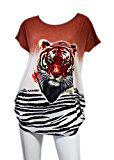

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  burnt umber tiger tshirt zebra stripes xl  xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.0
--------------------------------------------------------------------------------


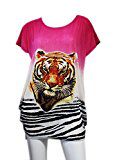

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                         pink tiger tshirt zebra stripes xl  xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 1.73205080757
--------------------------------------------------------------------------------


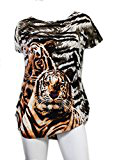

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                 brown  white tiger tshirt tiger stripes xl  xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 2.44948974278
--------------------------------------------------------------------------------


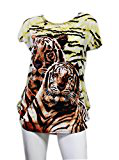

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                            yellow tiger tshirt tiger stripes  l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 2.64575131106
--------------------------------------------------------------------------------


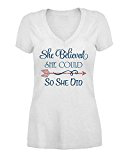

asin                                                        B07568NZX4
brand                                                     Rustic Grace
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                           believed could tshirt 
formatted_price                                                 $27.00
Name: 49098, dtype: object
Euclidean distance 3.0
--------------------------------------------------------------------------------


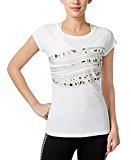

asin                                                        B01NB0NKRO
brand                                                         Ideology
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                ideology graphic tshirt xl white 
formatted_price                                                 $10.00
Name: 77570, dtype: object
Euclidean distance 3.0
--------------------------------------------------------------------------------


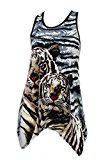

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                grey  white tiger tank top tiger stripes xl  xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 3.0
--------------------------------------------------------------------------------


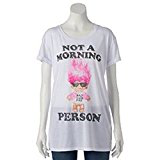

asin                                                        B01CLS8LMW
brand                                                            Awake
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                        morning person tshirt  troll picture  xl 
formatted_price                                                 $19.99
Name: 40868, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


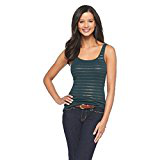

asin                                                        B01KVZUB6G
brand                                                           Merona
color                                                            Green
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                       merona green gold stripes 
formatted_price                                                 $13.71
Name: 117861, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


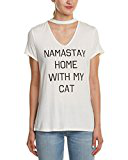

asin                                                        B0733R2CJK
brand                                                             BLVD
color                                                            Ivory
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                    blvd womens graphic tshirt l 
formatted_price                                                 $24.99
Name: 160855, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


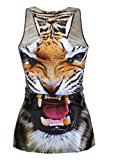

asin                                                        B012VQLT6Y
brand                                                       KM T-shirt
color                                                          Leopard
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                         km tiger printed sleeveless vest tshirt 
formatted_price                                                  $8.55
Name: 112290, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


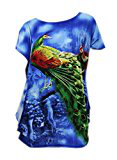

asin                                                        B00JXQC8L6
brand                                                           Si Row
color                                                             Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                                    blue peacock print tshirt  l 
formatted_price                                                 $19.61
Name: 146397, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


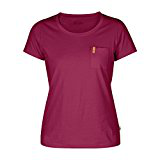

asin                                                        B06XC3CZF6
brand                                                       Fjallraven
color                                                             Plum
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                         fjallraven  womens ovik tshirt plum xxl 
formatted_price                                                 $33.44
Name: 383, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


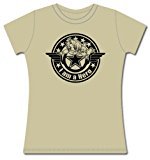

asin                                                        B005IT8OBA
brand                                                          Hetalia
color                                                            Khaki
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                          hetalia us girl tshirt 
formatted_price                                                 $25.89
Name: 114847, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


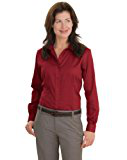

asin                                                        B0088PN0LA
brand                                                        Red House
color                                                         Deep Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                              APPAREL
title                               canvas 3001 30s tshirt  kelly  xl 
formatted_price                                                 $55.76
Name: 25302, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


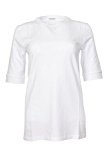

asin                                                        B06X99V6WC
brand                                               Brunello Cucinelli
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                        brunello cucinelli tshirt women white xl 
formatted_price                                                $175.99
Name: 83718, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


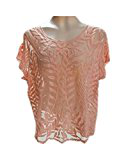

asin                                                        B06Y1JPW1Q
brand                                                      Xhilaration
color                                                           Salmon
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                       xhilaration womens lace tshirt salmon xxl 
formatted_price                                                 $22.36
Name: 17062, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


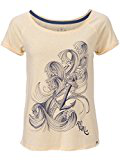

asin                                                        B06X6GX6WG
brand                                                           Animal
color                                               Banana Yellow Marl
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                   animal oceania tshirt  yellow 
formatted_price                                                 $38.95
Name: 14207, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


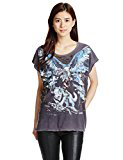

asin                                                        B017X8PW9U
brand                                                           Diesel
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                     diesel tserraf tshirt black 
formatted_price                                                 $79.99
Name: 83386, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


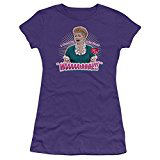

asin                                                        B00IAA4JIQ
brand                                                      I Love Lucy
color                                                           Purple
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      juniors love lucywaaaaahhhh tshirt size xl 
formatted_price                                                 $14.66
Name: 54352, dtype: object
Euclidean distance 3.16227766017
--------------------------------------------------------------------------------


In [10]:
def bow_model(product_id, no_of_results):
    pairwise_dist = pairwise_distances(title_feature,title_feature[product_id])
    indices = np.argsort(pairwise_dist.flatten())[0:no_of_results]
    distances = np.sort(pairwise_dist.flatten())[0:no_of_results]
    df = data.index[indices]
    
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', distances[i])
        print('-'*80)
        
bow_model(12566,20)        

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
x = tfidf_text = TfidfVectorizer(min_df = 0)

In [102]:
y = tfidf_feature = tfidf_text.fit_transform(data.title)

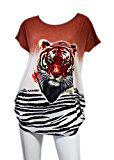

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.0
--------------------------------------------------------------------------------


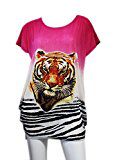

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 0.753633191245
--------------------------------------------------------------------------------


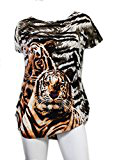

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 0.935764394377
--------------------------------------------------------------------------------


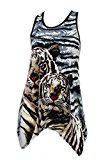

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  grey white tiger tank top tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 0.95861535242
--------------------------------------------------------------------------------


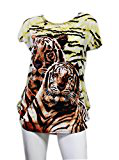

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 1.00007496145
--------------------------------------------------------------------------------


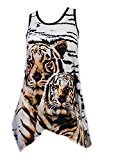

asin                                                        B00JXQAO94
brand                                                           Si Row
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                      black white tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 74241, dtype: object
Euclidean distance 1.02321555246
--------------------------------------------------------------------------------


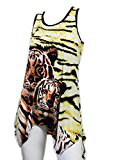

asin                                                        B00JXQAUWA
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                           yellow tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 72149, dtype: object
Euclidean distance 1.0319918463
--------------------------------------------------------------------------------


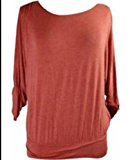

asin                                                        B06XSCVFT5
brand                                                         Studio M
color                                                     Burnt Orange
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                studio womens burnt orange dolman top size med...
formatted_price                                                 $39.99
Name: 121220, dtype: object
Euclidean distance 1.21068436704
--------------------------------------------------------------------------------


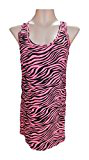

asin                                                        B06Y2GTYPM
brand                                                    No Boundaries
color                                                      Pink Zebra,
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                boundaries juniors racerback ribbed tank pink ...
formatted_price                                                 $11.51
Name: 167643, dtype: object
Euclidean distance 1.21216838107
--------------------------------------------------------------------------------


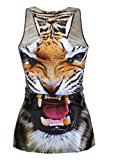

asin                                                        B012VQLT6Y
brand                                                       KM T-shirt
color                                                          Leopard
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                         km tiger printed sleeveless vest tshirt 
formatted_price                                                  $8.55
Name: 112290, dtype: object
Euclidean distance 1.21979064028
--------------------------------------------------------------------------------


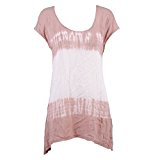

asin                                                        B06Y1VN8WQ
brand                                                       Black Swan
color                                                        Raw Umber
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      black swan estera raw umber l womens shirt 
formatted_price                                                 $19.97
Name: 25312, dtype: object
Euclidean distance 1.220684966
--------------------------------------------------------------------------------


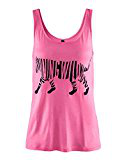

asin                                                        B00Z6HEXWI
brand                                                 Black Temptation
color                                                     Multicolored
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                               BLAZER
title                western zebra pattern sleeveless shirt vest ta...
formatted_price                                                 $12.76
Name: 19615, dtype: object
Euclidean distance 1.22128139212
--------------------------------------------------------------------------------


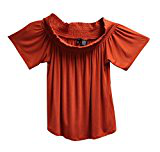

asin                                                        B074TR12BH
brand                                                      Ultra Flirt
color                                                        Burnt Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                ultra flirt short sleeve shoulder blouse burnt...
formatted_price                                                 $27.50
Name: 67899, dtype: object
Euclidean distance 1.23133640946
--------------------------------------------------------------------------------


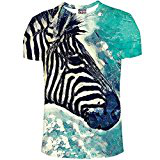

asin                                                        B072R2JXKW
brand                                                    WHAT ON EARTH
color                                                     Multicolored
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                womens zebra watercolor tshirt short sleeve fr...
formatted_price                                                 $44.94
Name: 43160, dtype: object
Euclidean distance 1.23184519726
--------------------------------------------------------------------------------


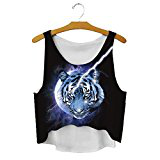

asin                                                        B074T8ZYGX
brand                                                     MKP Crop Top
color                                                      Black, Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                women fashion tiger printed black sleeveless c...
formatted_price                                                  $5.00
Name: 67166, dtype: object
Euclidean distance 1.23406074574
--------------------------------------------------------------------------------


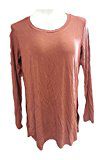

asin                                                        B071ZDF6T2
brand                                                          Mossimo
color                                                     Burnt Orange
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                mossimo womens long sleeve side split top burn...
formatted_price                                                 $17.99
Name: 112107, dtype: object
Euclidean distance 1.23527855777
--------------------------------------------------------------------------------


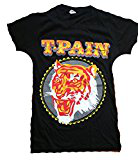

asin                                                        B01K0H02OG
brand                                                           Tultex
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                          tpain tiger juniors tshirt size xlarge 
formatted_price                                                  $6.49
Name: 81019, dtype: object
Euclidean distance 1.23645729881
--------------------------------------------------------------------------------


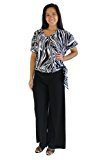

asin                                                        B00H8A6ZLI
brand                                                Vivian's Fashions
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      top zebra print dolman sleeve top one size 
formatted_price                                                 $27.99
Name: 31038, dtype: object
Euclidean distance 1.24996155053
--------------------------------------------------------------------------------


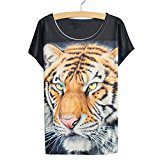

asin                                                        B010NN9RXO
brand                                                           YICHUN
color                                                    Multicoloured
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                 yichun womens tiger printed summer tshirts tops 
formatted_price                                                 $10.46
Name: 117229, dtype: object
Euclidean distance 1.25354614209
--------------------------------------------------------------------------------


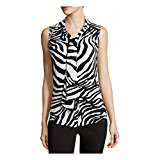

asin                                                        B06XBY5QXL
brand                                                    Liz Claiborne
color                                                Crema Multi/Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                            ACCESSORY
title                        liz claiborne zebra fronttie top size xl 
formatted_price                                                 $18.99
Name: 104629, dtype: object
Euclidean distance 1.25388329384
--------------------------------------------------------------------------------


In [135]:
def tfidf_model(product_id, no_of_results):
    pairwise_dist = pairwise_distances(tfidf_feature, tfidf_feature[product_id])
    indices = np.argsort(pairwise_dist.flatten())[0:no_of_results]
    p_dists = np.sort(pairwise_dist.flatten())[0:no_of_results]
    
    df = data.index[indices]
    
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', p_dists[i])
        print('-'*80)
tfidf_model(12566,20)        

In [32]:
idf_vectorizer = CountVectorizer()
y = idf_features = idf_vectorizer.fit_transform(data.title)

In [33]:
# idf_vectorizer.vocabulary_
idf_features  = idf_features.astype(float)
type(idf_features)

scipy.sparse.csr.csr_matrix

In [106]:
def word_contaning(word):
    return sum(1 for i in data.title if word in i.split())

def idf_value(word):
    return math.log(data.shape[0] / word_contaning(word))

In [107]:
start = time.clock()
for i in idf_vectorizer.vocabulary_.keys():
   
    idf_val = idf_value(i)
    
    for j in idf_features[:, idf_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        idf_features[j,idf_vectorizer.vocabulary_[i]] = idf_val
end = time.clock()        

In [133]:
print((end - start) / 60)

8.018908184202477


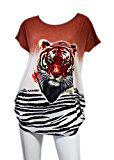

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.0
--------------------------------------------------------------------------------


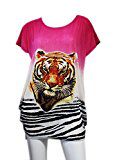

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 12.2050713112
--------------------------------------------------------------------------------


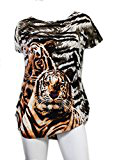

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 14.4683626856
--------------------------------------------------------------------------------


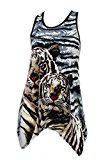

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  grey white tiger tank top tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 14.4868329248
--------------------------------------------------------------------------------


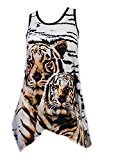

asin                                                        B00JXQAO94
brand                                                           Si Row
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                      black white tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 74241, dtype: object
Euclidean distance 14.8333929667
--------------------------------------------------------------------------------


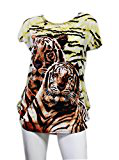

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 14.8987445167
--------------------------------------------------------------------------------


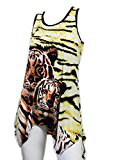

asin                                                        B00JXQAUWA
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                           yellow tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 72149, dtype: object
Euclidean distance 15.2244582873
--------------------------------------------------------------------------------


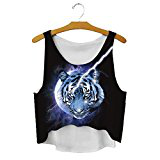

asin                                                        B074T8ZYGX
brand                                                     MKP Crop Top
color                                                      Black, Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                women fashion tiger printed black sleeveless c...
formatted_price                                                  $5.00
Name: 67166, dtype: object
Euclidean distance 17.0808129556
--------------------------------------------------------------------------------


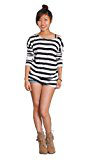

asin                                                        B00KF2N5PU
brand                                                         Vietsbay
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                   long sleeve top blouse tshirt 
formatted_price                                                 $14.99
Name: 76378, dtype: object
Euclidean distance 17.0901681256
--------------------------------------------------------------------------------


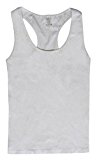

asin                                                        B00JPOZ9GM
brand                                                            Sofra
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                           womens tank top white 
formatted_price                                                  $9.94
Name: 160505, dtype: object
Euclidean distance 17.1532153376
--------------------------------------------------------------------------------


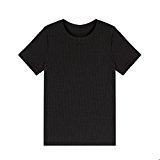

asin                                                        B074T9KG9Q
brand                                                             Rain
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                               womens casual short sleeve tshirt 
formatted_price                                                 $29.99
Name: 87333, dtype: object
Euclidean distance 17.3367152387
--------------------------------------------------------------------------------


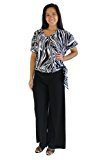

asin                                                        B00H8A6ZLI
brand                                                Vivian's Fashions
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      top zebra print dolman sleeve top one size 
formatted_price                                                 $27.99
Name: 31038, dtype: object
Euclidean distance 17.410075941
--------------------------------------------------------------------------------


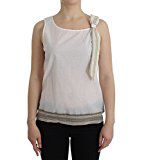

asin                                                        B074G5G5RK
brand                                                 ERMANNO SCERVINO
color                                                            Multi
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                          white top blouse tank shirt sleeveless 
formatted_price                                                $152.50
Name: 64282, dtype: object
Euclidean distance 17.5399213355
--------------------------------------------------------------------------------


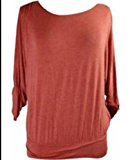

asin                                                        B06XSCVFT5
brand                                                         Studio M
color                                                     Burnt Orange
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                studio womens burnt orange dolman top size med...
formatted_price                                                 $39.99
Name: 121220, dtype: object
Euclidean distance 17.6127585437
--------------------------------------------------------------------------------


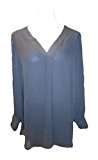

asin                                                        B06Y6FH453
brand                                                    Who What Wear
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                              wear womens vneck blouse black xxl 
formatted_price                                                 $18.42
Name: 63432, dtype: object
Euclidean distance 17.6237452825
--------------------------------------------------------------------------------


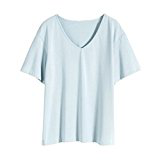

asin                                                        B074V45DCX
brand                                                             Rain
color                                                         Cerulean
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                         womens casual vneck short sleeve tshirt 
formatted_price                                                 $29.99
Name: 169892, dtype: object
Euclidean distance 17.6343424968
--------------------------------------------------------------------------------


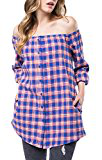

asin                                                        B07583CQFT
brand                                                           Very J
color                                                             Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                    j womens shoulder blue small 
formatted_price                                                 $44.97
Name: 167595, dtype: object
Euclidean distance 17.6375371274
--------------------------------------------------------------------------------


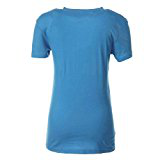

asin                                                        B073GJGVBN
brand                                                        Ivan Levi
color                                                            Green
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                              cotton tshirt womens fashion green 
formatted_price                                                 $27.90
Name: 103817, dtype: object
Euclidean distance 17.7230738913
--------------------------------------------------------------------------------


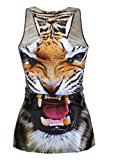

asin                                                        B012VQLT6Y
brand                                                       KM T-shirt
color                                                          Leopard
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                         km tiger printed sleeveless vest tshirt 
formatted_price                                                  $8.55
Name: 112290, dtype: object
Euclidean distance 17.7625885612
--------------------------------------------------------------------------------


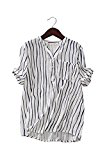

asin                                                        B00ZZMYBRG
brand                                                       HP-LEISURE
color                                      dark blue and white stripes
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                 womens loose striped top blouse 
formatted_price                                                 $20.99
Name: 181819, dtype: object
Euclidean distance 17.7795368647
--------------------------------------------------------------------------------


In [134]:
def idf_model(product_id, no_of_results):
    pairwise_dist = pairwise_distances(idf_features, idf_features[product_id])
    indices = np.argsort(pairwise_dist.flatten())[0:no_of_results]
    p_dists = np.sort(pairwise_dist.flatten())[0:no_of_results]
    
    df = data.index[indices]
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', p_dists[i])
        print('-'*80)
idf_model(12566,20)    

In [29]:
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [30]:
voc = model.keys()

def build_w2v(sentence, n_features, doc_id, m_type):
    n_words = 0
    f_vec = np.zeros((300,), dtype = 'float32')
    for word in sentence.split():
        n_words += 1
        if word in voc:
            if m_type == 'avg':
                f_vec = np.add(f_vec, model[word])
            if m_type == 'weighted' and word in idf_vectorizer.vocabulary_.keys():
                f_vec = np.add(f_vec, idf_features[doc_id, idf_vectorizer.vocabulary_[word]] * model[word])
                
    if n_words > 0:
        f_vec = np.divide(f_vec, n_words)
    return f_vec    

In [112]:
# f_vec = np.zeros((300,), dtype = 'float32')
# f_vec.shape

In [113]:
word2_vec = []
doc_id = 0

for i in data.title:
    word2_vec.append(build_w2v(i, 300, doc_id, 'avg'))
    doc_id += 1

word2_vec = np.array(word2_vec)   
word2_vec

array([[ -7.12608919e-02,   1.40211836e-01,  -3.06772087e-02, ...,
         -4.17386554e-02,   4.23284695e-02,   8.60032290e-02],
       [ -6.15285225e-02,   8.58866349e-02,   3.41224670e-03, ...,
          8.41267873e-03,  -1.15966797e-03,   8.13802064e-04],
       [ -3.44373919e-02,   1.58555768e-02,  -2.12944881e-03, ...,
         -5.37651926e-02,  -1.69626868e-03,   4.58170585e-02],
       ..., 
       [ -2.54211426e-02,   7.25555420e-02,   5.16586304e-02, ...,
         -3.25622559e-02,   2.12860107e-02,  -7.62939453e-05],
       [ -2.77709961e-02,   9.89990234e-02,  -3.41873169e-02, ...,
          5.74035645e-02,   9.70001221e-02,  -4.92095947e-03],
       [ -3.00292973e-03,   2.79235840e-02,   2.80761719e-02, ...,
         -1.55187994e-01,   2.18994133e-02,   1.96716309e-01]], dtype=float32)

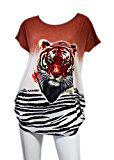

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.000690534
--------------------------------------------------------------------------------


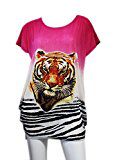

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 0.589193
--------------------------------------------------------------------------------


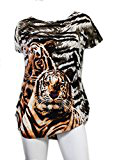

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 0.700344
--------------------------------------------------------------------------------


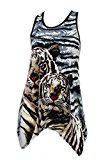

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  grey white tiger tank top tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 0.89284
--------------------------------------------------------------------------------


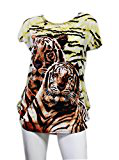

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 0.956013
--------------------------------------------------------------------------------


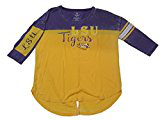

asin                                                        B073R5Q8HD
brand                                                        Colosseum
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                lsu tigers colosseum womens yellow purple slit...
formatted_price                                                 $19.99
Name: 123583, dtype: object
Euclidean distance 1.02297
--------------------------------------------------------------------------------


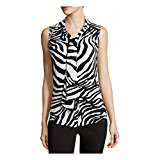

asin                                                        B06XBY5QXL
brand                                                    Liz Claiborne
color                                                Crema Multi/Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                            ACCESSORY
title                        liz claiborne zebra fronttie top size xl 
formatted_price                                                 $18.99
Name: 104629, dtype: object
Euclidean distance 1.06693
--------------------------------------------------------------------------------


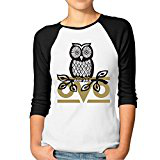

asin                                                        B01L8L73M2
brand                                           Hotgirl4 Raglan Design
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                hotgirl4 women owl ovo raglan triblend sleeve ...
formatted_price                                                  $9.01
Name: 108087, dtype: object
Euclidean distance 1.07314
--------------------------------------------------------------------------------


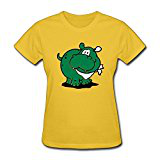

asin                                                        B01EJS5H06
brand                                                           Vansty
color                                                             Gold
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                vansty hippo naughty round neck tshirt women y...
formatted_price                                                  $9.50
Name: 146688, dtype: object
Euclidean distance 1.07572
--------------------------------------------------------------------------------


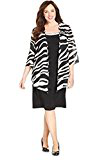

asin                                                        B01BO1XRK8
brand                                                           Le Bos
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                   le bos plus size zebra print jacket black 14w 
formatted_price                                                $156.96
Name: 59564, dtype: object
Euclidean distance 1.084
--------------------------------------------------------------------------------


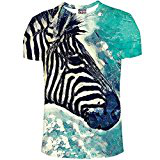

asin                                                        B072R2JXKW
brand                                                    WHAT ON EARTH
color                                                     Multicolored
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                womens zebra watercolor tshirt short sleeve fr...
formatted_price                                                 $44.94
Name: 43160, dtype: object
Euclidean distance 1.08422
--------------------------------------------------------------------------------


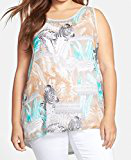

asin                                                        B074MJRGW6
brand                                              Two by Vince Camuto
color                                                             Gray
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                two vince camuto womens plus zebra fresco blou...
formatted_price                                                 $21.99
Name: 178328, dtype: object
Euclidean distance 1.0895
--------------------------------------------------------------------------------


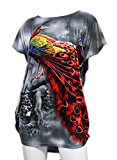

asin                                                        B00JXQCFRS
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                                 grey red peacock print tshirt l 
formatted_price                                                 $19.61
Name: 159912, dtype: object
Euclidean distance 1.09006
--------------------------------------------------------------------------------


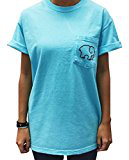

asin                                                        B01I53HU6K
brand                                                          ouxiuli
color                                                         Sky Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                ouxiuli womens elephant print pocket crew neck...
formatted_price                                                  $4.00
Name: 132135, dtype: object
Euclidean distance 1.09201
--------------------------------------------------------------------------------


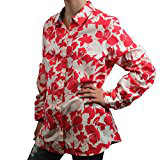

asin                                                        B0711NGTQM
brand                                                    THILFIGER RTW
color                                                       Medium Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                tommy hilfiger floralprint buttonfront shir ro...
formatted_price                                                 $13.50
Name: 36275, dtype: object
Euclidean distance 1.09234
--------------------------------------------------------------------------------


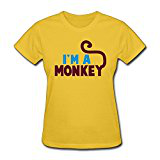

asin                                                        B01EFSLO8Y
brand                                                           Vansty
color                                                             Gold
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                vansty im monkey cute tail oneck shirt lady ye...
formatted_price                                                  $9.50
Name: 102367, dtype: object
Euclidean distance 1.0934
--------------------------------------------------------------------------------


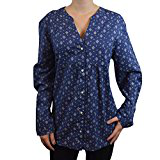

asin                                                        B0716TVWQ4
brand                                                    THILFIGER RTW
color                                                         Med Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                tommy hilfiger dotty printed splitneck shirt b...
formatted_price                                                 $17.99
Name: 50457, dtype: object
Euclidean distance 1.0942
--------------------------------------------------------------------------------


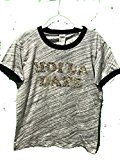

asin                                                        B0716MVPGV
brand                                                         V.Secret
color                                              Heather White Tiger
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                victorias secret pink crew neck short sleeves ...
formatted_price                                                 $46.00
Name: 109295, dtype: object
Euclidean distance 1.09483
--------------------------------------------------------------------------------


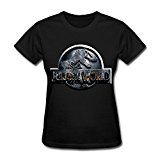

asin                                                        B016OPN4OI
brand                                                    TIKE Fashions
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                tike womens jurassic dino world 4 tshirt color...
formatted_price                                                  $9.38
Name: 24438, dtype: object
Euclidean distance 1.09513
--------------------------------------------------------------------------------


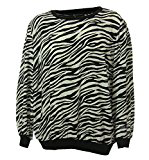

asin                                                        B018WDJCUA
brand                               INC - International Concepts Woman
color                                                      Multi Color
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                inc womens plus long sleeve animal print blous...
formatted_price                                                 $51.99
Name: 37805, dtype: object
Euclidean distance 1.09669
--------------------------------------------------------------------------------


In [136]:
def avgw2v_model(doc_id, n_results):
    p_dists = pairwise_distances(word2_vec, word2_vec[doc_id].reshape(1,-1))
    
    indices = np.argsort(p_dists.flatten())[0:n_results]
    pdist = np.sort(p_dists.flatten())[0:n_results]
    
    df = data.index[indices]
    
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', pdist[i])
        print('-'*80)
avgw2v_model(12566,20)        

In [34]:
word2_vec_weigh = []
doc_id = 0

for i in data.title:
    word2_vec_weigh.append(build_w2v(i, 300, doc_id, 'weighted'))
    doc_id += 1

word2_vec_weigh = np.array(word2_vec_weigh)   
word2_vec_weigh

array([[ -7.12608919e-02,   1.40211836e-01,  -3.06772087e-02, ...,
         -4.17386554e-02,   4.23284695e-02,   8.60032290e-02],
       [ -5.92600517e-02,   6.66809082e-02,   8.55954457e-03, ...,
          1.34582520e-02,   1.51163740e-02,  -8.82975291e-03],
       [ -3.44373919e-02,   1.58555768e-02,  -2.12944881e-03, ...,
         -5.37651926e-02,  -1.69626868e-03,   4.58170585e-02],
       ..., 
       [ -2.54211426e-02,   7.25555420e-02,   5.16586304e-02, ...,
         -3.25622559e-02,   2.12860107e-02,  -7.62939453e-05],
       [ -2.77709961e-02,   9.89990234e-02,  -3.41873169e-02, ...,
          5.74035645e-02,   9.70001221e-02,  -4.92095947e-03],
       [ -1.36962887e-02,   3.84704582e-02,   2.27539055e-02, ...,
         -1.40441895e-01,   2.81494148e-02,   1.89050287e-01]], dtype=float32)

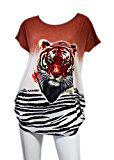

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.00390625
--------------------------------------------------------------------------------


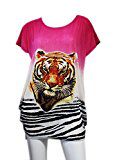

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 4.06389
--------------------------------------------------------------------------------


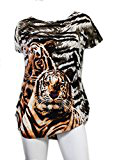

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 4.77094
--------------------------------------------------------------------------------


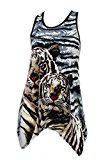

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  grey white tiger tank top tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 5.36016
--------------------------------------------------------------------------------


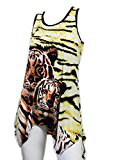

asin                                                        B00JXQAUWA
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                           yellow tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 72149, dtype: object
Euclidean distance 5.68952
--------------------------------------------------------------------------------


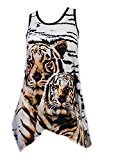

asin                                                        B00JXQAO94
brand                                                           Si Row
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                      black white tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 74241, dtype: object
Euclidean distance 5.69302
--------------------------------------------------------------------------------


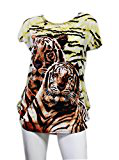

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 5.89344
--------------------------------------------------------------------------------


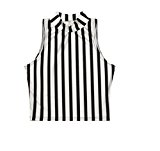

asin                                                        B015H41F6G
brand                                                           KINGDE
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                kingde black white zebra stripe sleeveless ves...
formatted_price                                                  $8.99
Name: 58718, dtype: object
Euclidean distance 6.13299
--------------------------------------------------------------------------------


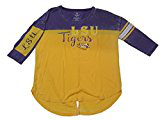

asin                                                        B073R5Q8HD
brand                                                        Colosseum
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                lsu tigers colosseum womens yellow purple slit...
formatted_price                                                 $19.99
Name: 123583, dtype: object
Euclidean distance 6.25671
--------------------------------------------------------------------------------


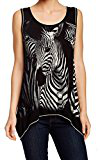

asin                                                        B074P8MD22
brand                                                           Edista
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                edista embellished zebra womens small tank cam...
formatted_price                                                 $53.79
Name: 46788, dtype: object
Euclidean distance 6.3922
--------------------------------------------------------------------------------


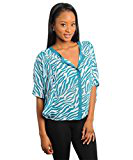

asin                                                        B00C0I3U3E
brand                                                         Stanzino
color                                                             Teal
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                stanzino womens zebra print dolman sleeve chif...
formatted_price                                                  $4.99
Name: 20708, dtype: object
Euclidean distance 6.4149
--------------------------------------------------------------------------------


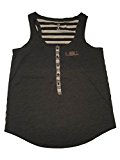

asin                                                        B073R4ZM7Y
brand                                                        Colosseum
color                                                             Gray
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                lsu tigers colosseum womens charcoal gray stri...
formatted_price                                                 $14.99
Name: 99019, dtype: object
Euclidean distance 6.45096
--------------------------------------------------------------------------------


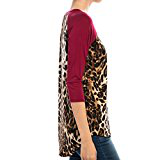

asin                                                        B01C6ORLDQ
brand                                                        1 Mad Fit
color                                                         Burgundy
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                          leopard print raglan top burgundy size 
formatted_price                                                 $31.95
Name: 61806, dtype: object
Euclidean distance 6.46341
--------------------------------------------------------------------------------


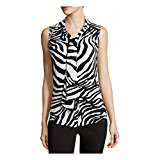

asin                                                        B06XBY5QXL
brand                                                    Liz Claiborne
color                                                Crema Multi/Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                            ACCESSORY
title                        liz claiborne zebra fronttie top size xl 
formatted_price                                                 $18.99
Name: 104629, dtype: object
Euclidean distance 6.53922
--------------------------------------------------------------------------------


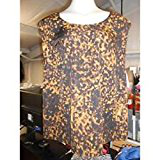

asin                                                        B071YF3WDD
brand                                                           Merona
color                                            , Brown Leopard Print
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                merona womens printed blouse brown leopard pri...
formatted_price                                                 $15.87
Name: 166886, dtype: object
Euclidean distance 6.5755
--------------------------------------------------------------------------------


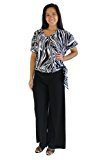

asin                                                        B00H8A6ZLI
brand                                                Vivian's Fashions
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      top zebra print dolman sleeve top one size 
formatted_price                                                 $27.99
Name: 31038, dtype: object
Euclidean distance 6.63822
--------------------------------------------------------------------------------


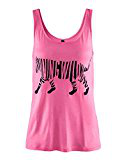

asin                                                        B00Z6HEXWI
brand                                                 Black Temptation
color                                                     Multicolored
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                               BLAZER
title                western zebra pattern sleeveless shirt vest ta...
formatted_price                                                 $12.76
Name: 19615, dtype: object
Euclidean distance 6.66074
--------------------------------------------------------------------------------


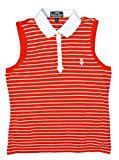

asin                                                        B00ILGH5OY
brand                                              Ralph Lauren Active
color                                               Burnt Orange/White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                lauren active ralph lauren striped polo tank t...
formatted_price                                                 $34.50
Name: 69395, dtype: object
Euclidean distance 6.68391
--------------------------------------------------------------------------------


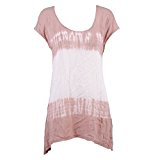

asin                                                        B06Y1VN8WQ
brand                                                       Black Swan
color                                                        Raw Umber
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      black swan estera raw umber l womens shirt 
formatted_price                                                 $19.97
Name: 25312, dtype: object
Euclidean distance 6.70576
--------------------------------------------------------------------------------


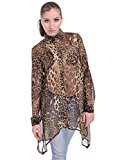

asin                                                        B00KSNTY7Y
brand                                                        Anna-Kaci
color                                                    Multicoloured
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                anna kaci womens asymmetrical sheer brown leop...
formatted_price                                                 $18.99
Name: 6675, dtype: object
Euclidean distance 6.70612
--------------------------------------------------------------------------------


In [116]:
def weighted_w2v_model(doc_id, n_results):
    p_dists = pairwise_distances(word2_vec_weigh, word2_vec_weigh[doc_id].reshape(1,-1))
    
    indices = np.argsort(p_dists.flatten())[0:n_results]
    pdist = np.sort(p_dists.flatten())[0:n_results]
    
    df = data.index[indices]
    
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', pdist[i])
        print('-'*80)
weighted_w2v_model(12566, 20)     

In [117]:
data.brand.head()

4                     FeatherLite
6     HX-Kingdom Fashion T-shirts
15                    FeatherLite
27                          FNC7C
46                   Fifth Degree
Name: brand, dtype: object

In [118]:
data[data['brand'].isnull()]

asin brand       color  \
16383   B00ED349LG  None        Pink   
17726   B00ED34AGK  None      Purple   
20194   B074HRPK2X  None       cream   
20735   B00A2HEPPW  None         Red   
21265   B00A2HFAS8  None      Purple   
23104   B073Q7K12V  None       multi   
23836   B00ED33EO4  None       Black   
24074   B00118UDFW  None       Black   
24652   B074HCRG27  None       multi   
26026   B00BSX3U64  None       Beige   
27230   B00NP67EFA  None      Purple   
31448   B00ED34A38  None      Orange   
32062   B00ED32P58  None       Black   
33861   B00A2HDF6C  None        Pink   
34560   B075317VZB  None        gray   
35296   B0125V52OU  None  Yellow 731   
38736   B0756MMPML  None       multi   
39318   B074PB7MDM  None       multi   
40123   B07575351N  None       multi   
43033   B0752VFS4Y  None        gray   
43852   B00ED35LEA  None        Gold   
44123   B00ED3062M  None       Black   
46572   B00ED35J60  None        Pink   
49655   B00ED31NIS  None      Purple   
50126   B074D6J88S  None       multi   
50184   B073XT4NRY  None        blue   
52396   B075753FDY  None        gray   
58257   B00DTWOAZC  None       White   
60422   B00DTWJR2I  None       Brown   
60685   B00A2HEADE  None       Black   
60843   B00ED35JHY  None       Black   
62263   B073YG3QQV  None       white   
63295   B074RN8847  None       multi   
63639   B00ED34R3Q  None       Black   
64064   B00ED3542O  None       Black   
64107   B00ED3477M  None       Black   
64274   B072S7GZVC  None       multi   
65088   B00ED35OA6  None       Black   
65545   B00ED33VBA  None        Blue   
66317   B00ED34EMK  None        Blue   
71603   B00HJU7K3O  None       Black   
80908   B008R82LNQ  None         Red   
153274  B0060MKVX8  None        Blue   
170257  B00CHV779W  None        Blue   
179396  B00ERJ0ONS  None        Grey   

                                         medium_image_url  \
16383   https://images-na.ssl-images-amazon.com/images...   
17726   https://images-na.ssl-images-amazon.com/images...   
20194   https://images-na.ssl-images-amazon.com/images...   
20735   https://images-na.ssl-images-amazon.com/images...   
21265   https://images-na.ssl-images-amazon.com/images...   
23104   https://images-na.ssl-images-amazon.com/images...   
23836   https://images-na.ssl-images-amazon.com/images...   
24074   https://images-na.ssl-images-amazon.com/images...   
24652   https://images-na.ssl-images-amazon.com/images...   
26026   https://images-na.ssl-images-amazon.com/images...   
27230   https://images-na.ssl-images-amazon.com/images...   
31448   https://images-na.ssl-images-amazon.com/images...   
32062   https://images-na.ssl-images-amazon.com/images...   
33861   https://images-na.ssl-images-amazon.com/images...   
34560   https://images-na.ssl-images-amazon.com/images...   
35296   https://images-na.ssl-images-amazon.com/images...   
38736   https://images-na.ssl-images-amazon.com/images...   
39318   https://images-na.ssl-images-amazon.com/images...   
40123   https://images-na.ssl-images-amazon.com/images...   
43033   https://images-na.ssl-images-amazon.com/images...   
43852   https://images-na.ssl-images-amazon.com/images...   
44123   https://images-na.ssl-images-amazon.com/images...   
46572   https://images-na.ssl-images-amazon.com/images...   
49655   https://images-na.ssl-images-amazon.com/images...   
50126   https://images-na.ssl-images-amazon.com/images...   
50184   https://images-na.ssl-images-amazon.com/images...   
52396   https://images-na.ssl-images-amazon.com/images...   
58257   https://images-na.ssl-images-amazon.com/images...   
60422   https://images-na.ssl-images-amazon.com/images...   
60685   https://images-na.ssl-images-amazon.com/images...   
60843   https://images-na.ssl-images-amazon.com/images...   
62263   https://images-na.ssl-images-amazon.com/images...   
63295   https://images-na.ssl-images-amazon.com/images...   
63639   https://images-na.ssl-images-amazon.com/images...   
64064   https://images-na.ssl-images-a

In [39]:
data['brand'].fillna(value = 'Not given', inplace = True)

In [40]:
data.isnull().sum()

asin                 0
brand                0
color                0
medium_image_url     0
product_type_name    0
title                0
formatted_price      0
dtype: int64

In [41]:
type(data.brand)

pandas.core.series.Series

In [42]:
brands = [x.replace(' ', '-') for x in data['brand'].values]
types = [x.replace(' ', '-') for x in data['product_type_name'].values]
colors = [x.replace(' ', '-') for x in data['color'].values]

In [43]:
brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

In [125]:
from scipy.sparse import hstack

In [126]:
extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [127]:
extra_features

<16042x5735 sparse matrix of type '<class 'numpy.int64'>'
	with 66179 stored elements in Compressed Sparse Row format>

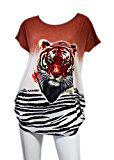

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.001953125
--------------------------------------------------------------------------------


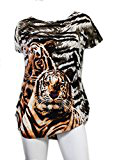

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 2.38547115326
--------------------------------------------------------------------------------


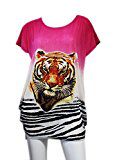

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 2.73905105609
--------------------------------------------------------------------------------


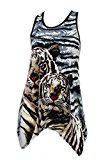

asin                                                        B00JXQAFZ2
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  grey white tiger tank top tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 116737, dtype: object
Euclidean distance 3.387187195
--------------------------------------------------------------------------------


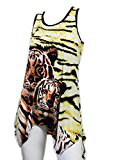

asin                                                        B00JXQAUWA
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                           yellow tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 72149, dtype: object
Euclidean distance 3.55186862964
--------------------------------------------------------------------------------


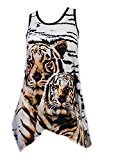

asin                                                        B00JXQAO94
brand                                                           Si Row
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                      black white tiger tank top tiger stripes l 
formatted_price                                                 $19.61
Name: 74241, dtype: object
Euclidean distance 3.5536174776
--------------------------------------------------------------------------------


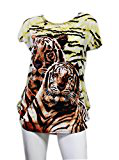

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 3.65382804889
--------------------------------------------------------------------------------


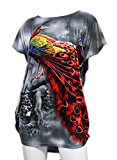

asin                                                        B00JXQCFRS
brand                                                           Si Row
color                                                             Grey
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                                 grey red peacock print tshirt l 
formatted_price                                                 $19.61
Name: 159912, dtype: object
Euclidean distance 4.12881164569
--------------------------------------------------------------------------------


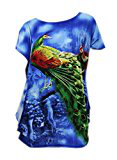

asin                                                        B00JXQC8L6
brand                                                           Si Row
color                                                             Blue
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                                     blue peacock print tshirt l 
formatted_price                                                 $19.61
Name: 146397, dtype: object
Euclidean distance 4.20390014667
--------------------------------------------------------------------------------


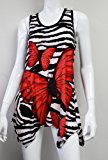

asin                                                        B00JV63CW2
brand                                                           Si Row
color                                                              Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                       red butterfly black white tank top xl xxl 
formatted_price                                                 $19.61
Name: 135891, dtype: object
Euclidean distance 4.28658676166
--------------------------------------------------------------------------------


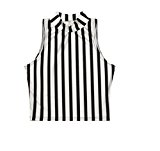

asin                                                        B015H41F6G
brand                                                           KINGDE
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                kingde black white zebra stripe sleeveless ves...
formatted_price                                                  $8.99
Name: 58718, dtype: object
Euclidean distance 4.38937059724
--------------------------------------------------------------------------------


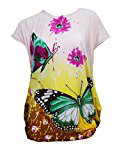

asin                                                        B00JXQBBMI
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                 yellow pink butterfly color burst tshirt xl xxl 
formatted_price                                                 $19.61
Name: 68773, dtype: object
Euclidean distance 4.39791030902
--------------------------------------------------------------------------------


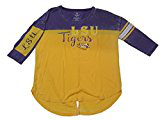

asin                                                        B073R5Q8HD
brand                                                        Colosseum
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                lsu tigers colosseum womens yellow purple slit...
formatted_price                                                 $19.99
Name: 123583, dtype: object
Euclidean distance 4.45122896516
--------------------------------------------------------------------------------


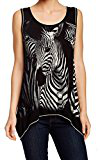

asin                                                        B074P8MD22
brand                                                           Edista
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                edista embellished zebra womens small tank cam...
formatted_price                                                 $53.79
Name: 46788, dtype: object
Euclidean distance 4.51897779787
--------------------------------------------------------------------------------


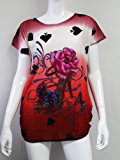

asin                                                        B00JV63QQE
brand                                                           Si Row
color                                                              Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                    red pink floral heel sleeveless shirt xl xxl 
formatted_price                                                 $19.61
Name: 147862, dtype: object
Euclidean distance 4.52937507647
--------------------------------------------------------------------------------


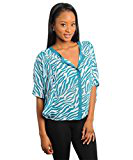

asin                                                        B00C0I3U3E
brand                                                         Stanzino
color                                                             Teal
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                stanzino womens zebra print dolman sleeve chif...
formatted_price                                                  $4.99
Name: 20708, dtype: object
Euclidean distance 4.53032614076
--------------------------------------------------------------------------------


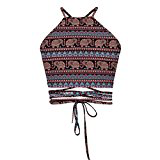

asin                                                        B01ER184O6
brand                                                       GuPoBoU168
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SKIRT
title                gupobou168 womens girls lady boho elephant str...
formatted_price                                                 $13.99
Name: 124400, dtype: object
Euclidean distance 4.54681702403
--------------------------------------------------------------------------------


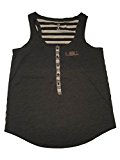

asin                                                        B073R4ZM7Y
brand                                                        Colosseum
color                                                             Gray
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       SPORTING_GOODS
title                lsu tigers colosseum womens charcoal gray stri...
formatted_price                                                 $14.99
Name: 99019, dtype: object
Euclidean distance 4.54835554445
--------------------------------------------------------------------------------


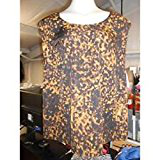

asin                                                        B071YF3WDD
brand                                                           Merona
color                                            , Brown Leopard Print
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                merona womens printed blouse brown leopard pri...
formatted_price                                                 $15.87
Name: 166886, dtype: object
Euclidean distance 4.61062742555
--------------------------------------------------------------------------------


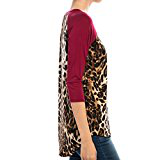

asin                                                        B01C6ORLDQ
brand                                                        1 Mad Fit
color                                                         Burgundy
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                          leopard print raglan top burgundy size 
formatted_price                                                 $31.95
Name: 61806, dtype: object
Euclidean distance 4.64591827429
--------------------------------------------------------------------------------


In [128]:
def w2v_idf_brand(doc_id, w1, w2, num_results):
    w2v_idf_dist = pairwise_distances(word2_vec_weigh, word2_vec_weigh[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    
    pairwise_dist = (w1 * w2v_idf_dist + w2 * ex_feat_dist) / (w1 + w2)
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df = data.index[indices]
    
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', pdists[i])
        print('-'*80)
    
w2v_idf_brand(12566, 5, 5, 20)    

In [23]:
bottleneck_feature_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')

In [24]:
asins = list(asins)
df_asins = list(data['asin'])

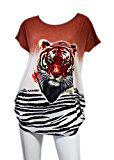

142055    burnt umber tiger tshirt zebra stripes xl xxl 
Name: title, dtype: object
142055    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 0.0625
--------------------------------------------------------------------------------


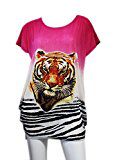

160819    pink tiger tshirt zebra stripes xl xxl 
Name: title, dtype: object
160819    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 30.0501
--------------------------------------------------------------------------------


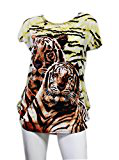

169492    yellow tiger tshirt tiger stripes l 
Name: title, dtype: object
169492    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 41.2611
--------------------------------------------------------------------------------


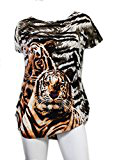

160670    brown white tiger tshirt tiger stripes xl xxl 
Name: title, dtype: object
160670    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 44.0002
--------------------------------------------------------------------------------


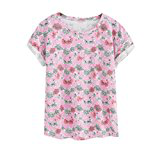

154115    kawaii pastel tops tees pink flower design 
Name: title, dtype: object
154115    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 47.3825
--------------------------------------------------------------------------------


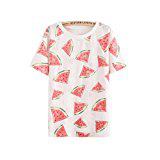

112719    womens thin style tops tees pastel watermelon ...
Name: title, dtype: object
112719    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 47.7184
--------------------------------------------------------------------------------


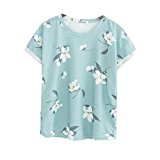

168306    kawaii pastel tops tees baby blue flower design 
Name: title, dtype: object
168306    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 47.9021
--------------------------------------------------------------------------------


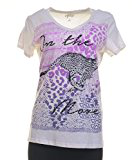

160390    edv cheetah run purple multi xl 
Name: title, dtype: object
160390    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.0465
--------------------------------------------------------------------------------


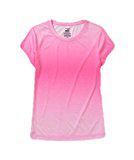

140683    danskin womens vneck loose performance tee xsm...
Name: title, dtype: object
140683    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.1019
--------------------------------------------------------------------------------


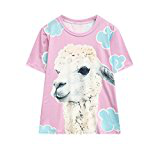

158774    summer alpaca 3d pastel casual loose tops tee ...
Name: title, dtype: object
158774    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.1189
--------------------------------------------------------------------------------


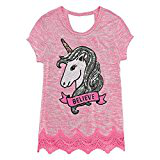

90195    miss chievous juniors striped peplum tank top ...
Name: title, dtype: object
90195    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.1313
--------------------------------------------------------------------------------


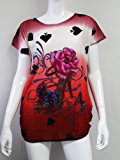

147862    red pink floral heel sleeveless shirt xl xxl 
Name: title, dtype: object
147862    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.1695
--------------------------------------------------------------------------------


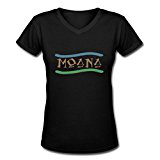

90284    moana logo adults hot v neck shirt black xxl 
Name: title, dtype: object
90284    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.2568
--------------------------------------------------------------------------------


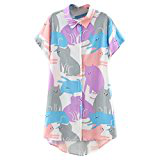

9762    abaday multicolor cartoon cat print short slee...
Name: title, dtype: object
9762    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.2656
--------------------------------------------------------------------------------


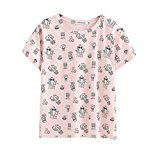

103694    kawaii cotton pastel tops tees peach pink cact...
Name: title, dtype: object
103694    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.3626
--------------------------------------------------------------------------------


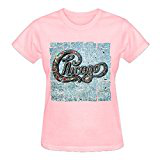

127738    chicago chicago 18 shirt women pink 
Name: title, dtype: object
127738    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.3836
--------------------------------------------------------------------------------


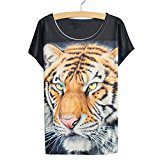

117229    yichun womens tiger printed summer tshirts tops 
Name: title, dtype: object
117229    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.4493
--------------------------------------------------------------------------------


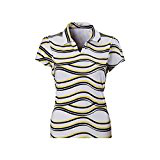

32666    nancy lopez whimsy short sleeve whiteblacklemo...
Name: title, dtype: object
32666    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.4789
--------------------------------------------------------------------------------


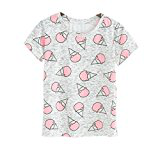

160940    womens tops tees pastel peach ice cream cone p...
Name: title, dtype: object
160940    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.558
--------------------------------------------------------------------------------


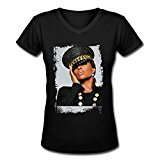

117685    uswomens mary j blige without tshirts shirt 
Name: title, dtype: object
117685    https://images-na.ssl-images-amazon.com/images...
Name: medium_image_url, dtype: object
Euclidean distance 48.6144
--------------------------------------------------------------------------------


In [25]:
def cnn_model(doc_id, n_results): 
    
    doc_id = asins.index(df_asins[doc_id])
    p_dists = pairwise_distances(bottleneck_feature_train, bottleneck_feature_train[doc_id].reshape(1,-1))
    indices = np.argsort(p_dists.flatten())[0:n_results]
    pdist = np.sort(p_dists.flatten())[0:n_results]
    
    for i in range(0, len(indices)):
        show_img(data.medium_image_url[data['asin'] == asins[indices[i]]].values[0])
        print(data.title[data['asin'] == asins[indices[i]]])
        print(data.medium_image_url[data['asin'] == asins[indices[i]]])
        print('Euclidean distance', pdist[i])
        print('-'*80)

cnn_model(12566, 20)     

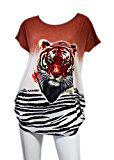

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   burnt umber tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object
Euclidean distance 0.034914
--------------------------------------------------------------------------------


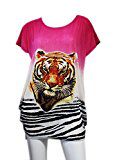

asin                                                        B00JXQASS6
brand                                                           Si Row
color                                                             Pink
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                          pink tiger tshirt zebra stripes xl xxl 
formatted_price                                                 $19.61
Name: 160819, dtype: object
Euclidean distance 16.8974
--------------------------------------------------------------------------------


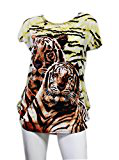

asin                                                        B00JXQCUIC
brand                                                           Si Row
color                                                           Yellow
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                             yellow tiger tshirt tiger stripes l 
formatted_price                                                 $19.61
Name: 169492, dtype: object
Euclidean distance 23.4767
--------------------------------------------------------------------------------


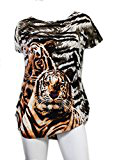

asin                                                        B00JXQCWTO
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                   brown white tiger tshirt tiger stripes xl xxl 
formatted_price                                                 $19.61
Name: 160670, dtype: object
Euclidean distance 24.8073
--------------------------------------------------------------------------------


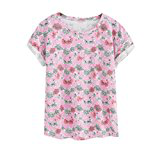

asin                                                        B071FCWD97
brand                                            Namnoi Clothing Store
color                                                          As Show
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                      kawaii pastel tops tees pink flower design 
formatted_price                                                 $18.00
Name: 154115, dtype: object
Euclidean distance 27.1265
--------------------------------------------------------------------------------


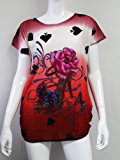

asin                                                        B00JV63QQE
brand                                                           Si Row
color                                                              Red
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                    red pink floral heel sleeveless shirt xl xxl 
formatted_price                                                 $19.61
Name: 147862, dtype: object
Euclidean distance 27.1656
--------------------------------------------------------------------------------


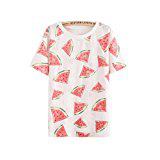

asin                                                        B01JUNHBRM
brand                                            Namnoi Clothing Store
color                                                          As show
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                womens thin style tops tees pastel watermelon ...
formatted_price                                                 $16.90
Name: 112719, dtype: object
Euclidean distance 27.266
--------------------------------------------------------------------------------


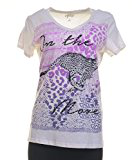

asin                                                        B01CUPYBM0
brand                                                          Styleco
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                                 edv cheetah run purple multi xl 
formatted_price                                                  $8.49
Name: 160390, dtype: object
Euclidean distance 27.3135
--------------------------------------------------------------------------------


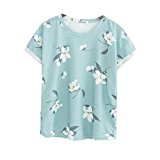

asin                                                        B071SBCY9W
brand                                            Namnoi Clothing Store
color                                                          As Show
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                 kawaii pastel tops tees baby blue flower design 
formatted_price                                                 $18.00
Name: 168306, dtype: object
Euclidean distance 27.3872
--------------------------------------------------------------------------------


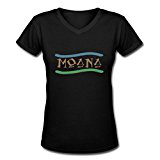

asin                                                        B01LX6H43D
brand                                                            BOBOB
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                    moana logo adults hot v neck shirt black xxl 
formatted_price                                                  $8.84
Name: 90284, dtype: object
Euclidean distance 27.4077
--------------------------------------------------------------------------------


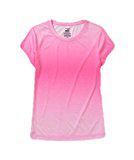

asin                                                        B01F7PHXY8
brand                                                      Danskin Now
color                                                      Pink Hombre
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                danskin womens vneck loose performance tee xsm...
formatted_price                                                 $11.99
Name: 140683, dtype: object
Euclidean distance 27.4212
--------------------------------------------------------------------------------


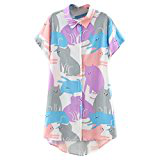

asin                                                        B01CR57YY0
brand                                                           ABADAY
color                                                            Multi
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                abaday multicolor cartoon cat print short slee...
formatted_price                                                 $16.99
Name: 9762, dtype: object
Euclidean distance 27.4491
--------------------------------------------------------------------------------


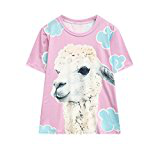

asin                                                        B01I80A93G
brand                                            Namnoi Clothing Store
color                                                          As show
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                summer alpaca 3d pastel casual loose tops tee ...
formatted_price                                                 $24.00
Name: 158774, dtype: object
Euclidean distance 27.5101
--------------------------------------------------------------------------------


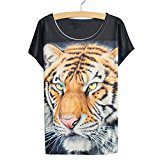

asin                                                        B010NN9RXO
brand                                                           YICHUN
color                                                    Multicoloured
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                 yichun womens tiger printed summer tshirts tops 
formatted_price                                                 $10.46
Name: 117229, dtype: object
Euclidean distance 27.5419
--------------------------------------------------------------------------------


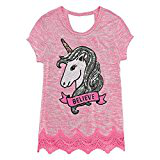

asin                                                        B0177DM70S
brand                               MISS CHIEVOUS/AROUND THE WORLD APP
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                miss chievous juniors striped peplum tank top ...
formatted_price                                                  $9.98
Name: 90195, dtype: object
Euclidean distance 27.5701
--------------------------------------------------------------------------------


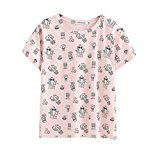

asin                                                        B071WYLBZS
brand                                            Namnoi Clothing Store
color                                                          As Show
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                kawaii cotton pastel tops tees peach pink cact...
formatted_price                                                 $18.00
Name: 103694, dtype: object
Euclidean distance 27.6489
--------------------------------------------------------------------------------


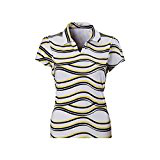

asin                                                        B01MPX6IDX
brand                                                      Nancy Lopez
color                                           White/Black/Lemon Drop
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                nancy lopez whimsy short sleeve whiteblacklemo...
formatted_price                                                 $19.99
Name: 32666, dtype: object
Euclidean distance 27.6668
--------------------------------------------------------------------------------


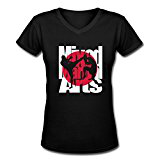

asin                                                        B01JQ096HW
brand                                                        Constanza
color                                                            Black
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                 BOOKS_1973_AND_LATER
title                women japanese mixed martial arts teeblack tsh...
formatted_price                                                  $9.69
Name: 153672, dtype: object
Euclidean distance 27.6686
--------------------------------------------------------------------------------


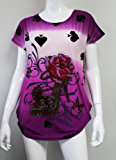

asin                                                        B00JV63VC8
brand                                                           Si Row
color                                                           Purple
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                      purple floral heel sleeveless shirt xl xxl 
formatted_price                                                 $19.61
Name: 77322, dtype: object
Euclidean distance 27.6824
--------------------------------------------------------------------------------


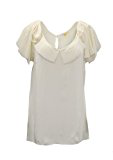

asin                                                        B01B6E0DX2
brand                                                      Leifsdottir
color                                                            Ivory
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                leifsdottir womens accordion pleated blouse sz...
formatted_price                                                $107.99
Name: 27831, dtype: object
Euclidean distance 27.6884
--------------------------------------------------------------------------------


In [46]:
def brand_color_text_image_model(doc_id, num_results, w1, c1, b1, i1):
    doc_id_image = asins.index(df_asins[doc_id])
    
    image_dist = i1 * pairwise_distances(bottleneck_feature_train, bottleneck_feature_train[doc_id_image].reshape(1,-1))
    w2v_idf_dist = w1 * pairwise_distances(word2_vec_weigh, word2_vec_weigh[doc_id].reshape(1,-1))
    color_dist = c1 * pairwise_distances(color_features, color_features[doc_id])
    brand_dist = b1 * pairwise_distances(brand_features, brand_features[doc_id])
   
    
    pairwise_dist = np.zeros((data.shape[0],1), dtype = 'float32')
    
    for i in range(0, data.shape[0]):
        image_index = asins.index(data.asin[data.index[i]])
        pairwise_dist[i] =  w2v_idf_dist[i] +  color_dist[i] + brand_dist[i] +  image_dist[image_index]
    
   
    pairwise_dist = np.divide(pairwise_dist, w1 + c1 + b1 + i1)
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df = data.index[indices]
    for i in range(0, len(df)):
        show_img(data.medium_image_url[df[i]])
        print(data.loc[df[i]])
        print('Euclidean distance', pdists[i])
        print('-'*80)
    
    
brand_color_text_image_model(12566,20, 10, 1, 5, 20)    